<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp-DataScience-projeto-modulo1/blob/main/Bootcamp_DataScience_final_modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Módulo 1 - Bootcamp Data Science Aplicada 2 by [Alura](https://www.alura.com.br/) 

Autor: Helton Cordeiro

e-mail: heltoncordeiro@gmail.com


---

## **Objetivo da análise**

Vamos analisar a quantidade de pacientes que vieram a óbitos na realização de procedimentos de Média ou Alta Complexidade ocorridos por Unidades da Federação.
Vamos verificar o percentual de insucesso nesses procedimentos em relação a quantidade total de internações.

A partir dessa análise poderemos verificar qual Unidade da Federação está conseguindo mais sucesso na realização de procedimentos com pacientes internados que não venham a óbito. 

---

##Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
pd.options.display.float_format = "{:,.2f}".format
sns.set()
plt.style.use('seaborn')

##Fonte dos dados utilizadas

---

Informações obtidas do site [TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi)

Caminho no site: Informações de Saúde TABNET -> Assistência à Saúde -> Dados Consolidados AIH (RD), por local de internação, a partir de 2008 -> Brasil por região e unidade de Federação. **Dados obtidos em 29/05/2021**.

Filtros para quantidade de óbitos:
*   **Linha**: Unidade da Federação
*   **Coluna**: Complexidade
*   **Conteúdo**: Óbitos
*   **Período**: Jan/2008 até Dez/2020

**Arquivo no Drive**: /content/drive/MyDrive/databases/Obitos_Complexidade_UF_A105605189_28_143_208.csv

**GitHub**: https://github.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo1/raw/main/Dados/Obitos_Complexidade_UF_A105605189_28_143_208.csv

---

Filtros para quantidade de internações:
*   **Linha**: Unidade da Federação
*   **Coluna**: Complexidade
*   **Conteúdo**: Internações
*   **Período**: Jan/2008 até Dez/2020

**Arquivo no Drive**: /content/drive/MyDrive/databases/Internacoes_Complexidade_UF_A121539189_28_143_208.csv

**GitHub**: https://github.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo1/raw/main/Dados/Internacoes_Complexidade_UF_A121539189_28_143_208.csv

---



### Realizando a carga de dados

In [2]:
dados_obitos_raw = pd.read_csv("/content/drive/MyDrive/databases/Obitos_Complexidade_UF_A105605189_28_143_208.csv", 
                               engine='python', encoding="ISO-8859-1", 
                               skiprows=3, sep=";", skipfooter=12, 
                               thousands=".", decimal=",")
dados_obitos_raw.head()

,Unidade da Federação,Média complexidade,Alta complexidade,Total
0,11 Rondônia,34496,1235,35731
1,12 Acre,17647,432,18079
2,13 Amazonas,55365,4856,60221
3,14 Roraima,10996,671,11667
4,15 Pará,127980,7941,135921


In [3]:
dados_internacoes_raw = pd.read_csv("/content/drive/MyDrive/databases/Internacoes_Complexidade_UF_A121539189_28_143_208.csv", 
                                    engine='python', encoding="ISO-8859-1", 
                                    skiprows=3, sep=";", skipfooter=12, 
                                    thousands=".", decimal=",")
dados_internacoes_raw.head()

,Unidade da Federação,Média complexidade,Alta complexidade,Não se aplica,Total
0,11 Rondônia,1339768,26413,-,1366181
1,12 Acre,615107,10595,-,625702
2,13 Amazonas,2134046,67071,-,2201117
3,14 Roraima,449424,6826,-,456250
4,15 Pará,6267860,112831,-,6380691


### **Tratamento dos dados** 

---



#### Dados de óbitos

In [4]:
dados_obitos = dados_obitos_raw.copy()
dados_obitos_ordenados = dados_obitos.sort_values("Total", ascending=False)
mapa = { 'Unidade da Federação' : 'UF',
         'Média complexidade' : 'Obitos_Media_Complexidade',
         'Alta complexidade' : 'Obitos_Alta_Complexidade' }
dados_obitos_ordenados.rename(columns=mapa, inplace=True)
dados_obitos_ordenados.head()

,UF,Obitos_Media_Complexidade,Obitos_Alta_Complexidade,Total
19,35 São Paulo,1431751,96314,1528065
16,31 Minas Gerais,643455,42149,685604
18,33 Rio de Janeiro,514427,21779,536206
22,43 Rio Grande do Sul,434010,33471,467481
20,41 Paraná,349505,39723,389228


Vamos remover a coluna 'Total' para não influenciar os gráficos e vamos simplificar a Unidade da Federação.

In [5]:
dados_obitos_ordenados_sem_total = dados_obitos_ordenados.drop("Total", axis=1)
dados_obitos_ordenados_sem_total = dados_obitos_ordenados_sem_total.set_index("UF")
dados_obitos_ordenados_sem_total.index = dados_obitos_ordenados_sem_total.index.str[3:]
dados_obitos_ordenados_sem_total.head()

,Obitos_Media_Complexidade,Obitos_Alta_Complexidade
UF,,
São Paulo,1431751,96314
Minas Gerais,643455,42149
Rio de Janeiro,514427,21779
Rio Grande do Sul,434010,33471
Paraná,349505,39723


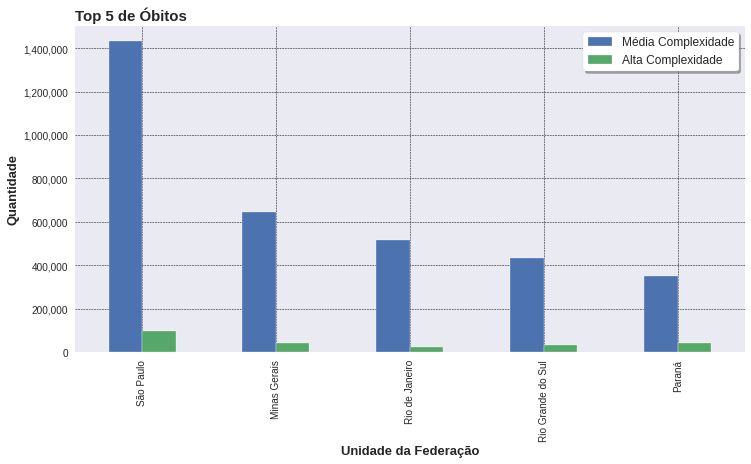

In [6]:
ax = dados_obitos_ordenados_sem_total.head().plot(kind="bar",figsize=(12,6))
ax.set_title('Top 5 de Óbitos', fontsize=15, weight='black', loc='left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Unidade da Federação', fontsize=13, weight='black')
ax.set_ylabel('Quantidade', fontsize=13, weight='black')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(('Média Complexidade','Alta Complexidade'), fontsize='large', frameon=True, facecolor='white', shadow=True)
plt.show()

#### Dados de Internações

In [7]:
dados_internacoes = dados_internacoes_raw.copy()
dados_internacoes_ordenados = dados_internacoes.sort_values("Total", ascending=False)
mapa = { 'Unidade da Federação' : 'UF',
         'Média complexidade' : 'Internacoes_Media_Complexidade',
         'Alta complexidade' : 'Internacoes_Alta_Complexidade' }
dados_internacoes_ordenados.rename(columns=mapa, inplace=True)
dados_internacoes_ordenados.head()

,UF,Internacoes_Media_Complexidade,Internacoes_Alta_Complexidade,Não se aplica,Total
19,35 São Paulo,28131406,2458440,3,30589849
16,31 Minas Gerais,14281574,1005624,-,15287198
15,29 Bahia,10283593,441604,2,10725199
20,41 Paraná,9154274,1015978,1,10170253
22,43 Rio Grande do Sul,8645827,897157,1,9542985


Vamos remover as colunas 'Não se aplica' e 'Total' e vamos simplificar a Unidade da Federação e padronizar para mesclar com os óbitos.


In [8]:
dados_internacoes_ordenados_sem_total = dados_internacoes_ordenados.drop(["Não se aplica", "Total"], axis=1)
dados_internacoes_ordenados_sem_total = dados_internacoes_ordenados_sem_total.set_index("UF")
dados_internacoes_ordenados_sem_total.index = dados_internacoes_ordenados_sem_total.index.str[3:]
dados_internacoes_ordenados_sem_total.head()

,Internacoes_Media_Complexidade,Internacoes_Alta_Complexidade
UF,,
São Paulo,28131406,2458440
Minas Gerais,14281574,1005624
Bahia,10283593,441604
Paraná,9154274,1015978
Rio Grande do Sul,8645827,897157


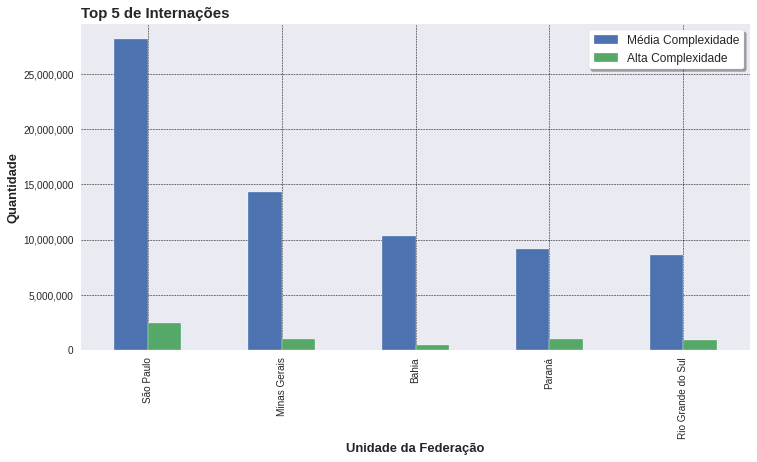

In [9]:
ax = dados_internacoes_ordenados_sem_total.head().plot(kind="bar",figsize=(12,6))
ax.set_title('Top 5 de Internações', fontsize=15, weight='black', loc='left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Unidade da Federação', fontsize=13, weight='black')
ax.set_ylabel('Quantidade', fontsize=13, weight='black')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(('Média Complexidade','Alta Complexidade'), fontsize='large', frameon=True, facecolor='white', shadow=True)
plt.show()

## **Manipulação e interpretação dos dados/gráficos**


---



###DataFrame com todos os dados

A função merge do DataFrame foi ensinado na Imersão Dados 3.

In [10]:
dados_merge = pd.merge( dados_obitos_ordenados_sem_total, dados_internacoes_ordenados_sem_total, on="UF")
dados_merge.head()

,Obitos_Media_Complexidade,Obitos_Alta_Complexidade,Internacoes_Media_Complexidade,Internacoes_Alta_Complexidade
UF,,,,
São Paulo,1431751,96314,28131406,2458440
Minas Gerais,643455,42149,14281574,1005624
Rio de Janeiro,514427,21779,8034360,504660
Rio Grande do Sul,434010,33471,8645827,897157
Paraná,349505,39723,9154274,1015978


In [11]:
dados_merge['Porc_Media_Complexidade'] = (dados_merge['Obitos_Media_Complexidade'] / dados_merge['Internacoes_Media_Complexidade']) * 100
dados_merge['Porc_Alta_Complexidade'] = (dados_merge['Obitos_Alta_Complexidade'] / dados_merge['Internacoes_Alta_Complexidade']) * 100
pd.options.display.float_format = "{:.4f}".format
dados_merge

,Obitos_Media_Complexidade,Obitos_Alta_Complexidade,Internacoes_Media_Complexidade,Internacoes_Alta_Complexidade,Porc_Media_Complexidade,Porc_Alta_Complexidade
UF,,,,,,
São Paulo,1431751,96314,28131406,2458440,5.0895,3.9177
Minas Gerais,643455,42149,14281574,1005624,4.5055,4.1913
Rio de Janeiro,514427,21779,8034360,504660,6.4028,4.3156
Rio Grande do Sul,434010,33471,8645827,897157,5.0199,3.7308
Paraná,349505,39723,9154274,1015978,3.8179,3.9098
Bahia,332973,14188,10283593,441604,3.2379,3.2128
Pernambuco,257444,23178,6372578,513709,4.0399,4.5119
Santa Catarina,212168,17089,5146996,473344,4.1222,3.6103
Ceará,198983,19182,5894219,338980,3.3759,5.6587


####Percentual de óbitos por procedimentos de média complexidade

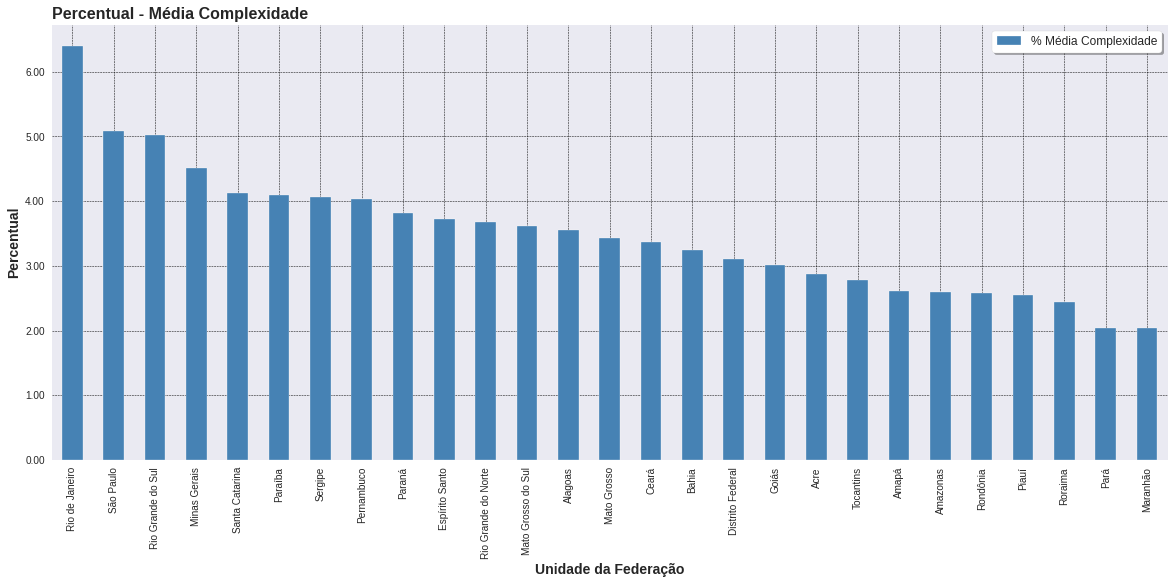

In [12]:
ax = dados_merge[['Porc_Media_Complexidade']].sort_values("Porc_Media_Complexidade", ascending=False).plot(kind="bar",figsize=(20,8), color='SteelBlue', grid=True)
ax.set_title('Percentual - Média Complexidade', fontsize=16, weight='black', loc='left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
ax.set_xlabel('Unidade da Federação', fontsize=14, weight='black')
ax.set_ylabel('Percentual', fontsize=14, weight='black')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(('% Média Complexidade','dummy'),fontsize='large', frameon=True, facecolor='white', shadow=True)
plt.show()

###Percentual de óbitos por procedimentos de Alta complexidade

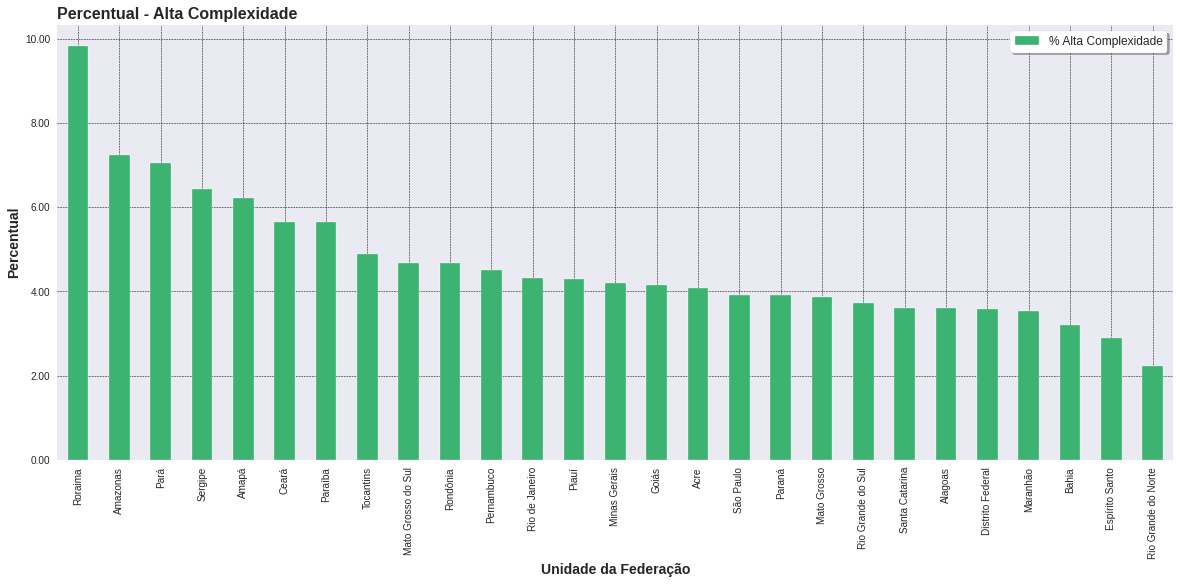

In [13]:
ax = dados_merge[['Porc_Alta_Complexidade']].sort_values("Porc_Alta_Complexidade", ascending=False).plot(kind="bar",figsize=(20,8), color='MediumSeaGreen', grid=True)
ax.set_title('Percentual - Alta Complexidade', fontsize=16, weight='black', loc='left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
ax.set_xlabel('Unidade da Federação', fontsize=14, weight='black')
ax.set_ylabel('Percentual', fontsize=14, weight='black')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(('% Alta Complexidade','dummy'),fontsize='large', frameon=True, facecolor='white', shadow=True)
plt.show()

###Percentual de óbitos por complexidade

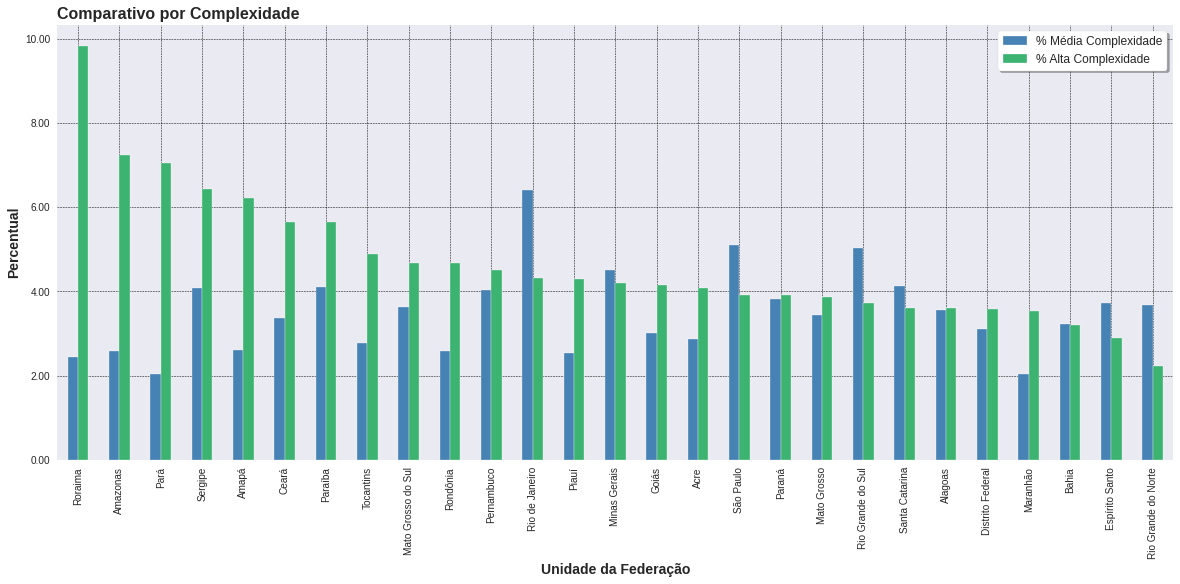

In [14]:
ax = dados_merge[['Porc_Media_Complexidade','Porc_Alta_Complexidade']].sort_values("Porc_Alta_Complexidade", ascending=False).plot(kind="bar",figsize=(20,8), grid=True, color=['SteelBlue','MediumSeaGreen'])
plt.style.use('seaborn')
ax.set_title('Comparativo por Complexidade', fontsize=16, weight='black', loc='left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
ax.set_xlabel('Unidade da Federação', fontsize=14, weight='black')
ax.set_ylabel('Percentual', fontsize=14, weight='black')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(('% Média Complexidade','% Alta Complexidade'),fontsize='large', frameon=True, facecolor='white', shadow=True)
plt.show()

# Conclusão

---

*Recomendo que para realização de procedimentos de Média Complexidade o faça no Maranhão e os de Alta Complexidade no Rio Grande do Norte, as chances de que tudo corra bem são maiores.*

*Nos dados de Roraima para os procedimentos de Alta Complexidade vejo com preocupação, quase 10% das internações acabam em óbito, apresentando uma diferença muito grande quando se verifica os dados para atendimento de Média Complexidade.*

*Nos estados da Bahia e do Paraná os percentuais estão próximos para ambas complexidades, 3.2% e 3.85% respectivamente, com essa informação deduzo que o cuidado no atendimento ao paciente é igualitário.*




# Sugestão de estudo

---

Analisar os óbitos por período e complexidade para avaliar se nossos profissionais de saúde estão melhorando suas experiências/técnicas para diminuir o percentual de óbitos nas internações para realização de procedimentos complexos. Roraima seria um bom Estado para essa análise, assim poderíamos verificar se o percentual de quase 10% de óbitos representa algo presente ou está sendo afetado pelo histórico.
